# Dependencies installation
we'll first try to fetch a pre-installed dependencies from google-drive, if it doesn't exist, we'll install it there for faster loading next *time*

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from src.general_methods import multi_run
from src.optics.channel_simulation import ChannelSimulator
from src.optics.split_step_fourier import SplitStepFourier
from src.general_methods.visualizer import Visualizer

ModuleNotFoundError: No module named 'src'

# Deep Learning research

## BER vs normalization factor

In [16]:
# test the impact of ber vs normalization factor for multiple n_symbols
ssf = SplitStepFourier(
    b2=-20e-27,
    gamma=0.003,
    t0=125e-12,
    z_n=1000e3,
    dt=1,
    h=200
)
cs = ChannelSimulator(m_qam=16,dt=1, verbose=False, ssf=ssf)

num_realisations = 3
# us_vec = multi_run.create_us_vec(n_steps=16, min_u=-3.5, max_u=1)
us_vec = np.linspace(start=0.001,stop=0.1,num=16)
N_symbols_vec = np.array([64, 128, 256, 512])

with np.printoptions(precision=2):
    print(f'normalizing factors are: {us_vec}')

    bers_vec, legends = [], []
    for n_sym in N_symbols_vec:
        cs.num_symbols = n_sym
        bers, errs = multi_run.ber_vs_us(cs, us_vec, n_realisations=num_realisations)
        print(f'{n_sym} symbols: errors found = {errs} / [{cs.length_of_msg * num_realisations} '
              f'= {cs.length_of_msg} bits * {num_realisations} realisations]')
        bers_vec.append(bers)
        legends.append(f'{n_sym} symbols')

SSF params: N = 5000, P_0 = 0.00042666666666666667
number of iterations in split step algo: 5000
normalizing factors are: [0.   0.01 0.01 0.02 0.03 0.03 0.04 0.05 0.05 0.06 0.07 0.07 0.08 0.09
 0.09 0.1 ]


100%|██████████| 48/48 [00:17<00:00,  2.69it/s]


64 symbols: errors found = [ 289  264  341  544  733  797  871  937  963  926  978  970  976  979
 1005  979] / [1920 = 640 bits * 3 realisations]


100%|██████████| 48/48 [00:29<00:00,  1.60it/s]


128 symbols: errors found = [ 537  531  672 1058 1451 1677 1819 1854 1866 1865 1935 1934 1975 1955
 1889 1942] / [3840 = 1280 bits * 3 realisations]


100%|██████████| 48/48 [00:56<00:00,  1.17s/it]


256 symbols: errors found = [1114 1041 1313 2066 2842 3396 3600 3596 3800 3851 3888 3890 3829 3911
 3893 3928] / [7680 = 2560 bits * 3 realisations]


100%|██████████| 48/48 [01:58<00:00,  2.46s/it]

512 symbols: errors found = [2187 2019 2608 4144 5749 6724 7177 7372 7501 7689 7703 7849 7685 7774
 7803 7791] / [15360 = 5120 bits * 3 realisations]


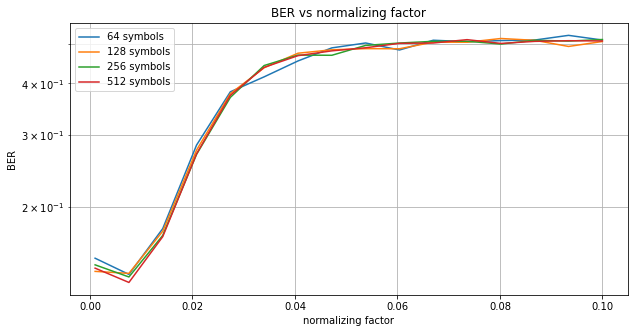

In [17]:
Visualizer.plot_bers(us_vec, bers_vec, legends)